In [132]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Import

In [133]:
new = pd.read_csv(r"C:\Users\hbagu\Downloads\50_Startups.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,RANDDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


C:\Users\hbagu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RANDDSpend', ylabel='Density'>

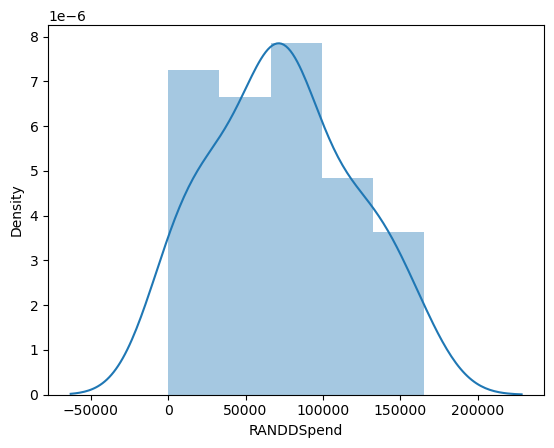

In [134]:
sns.distplot(new['RANDDSpend'])

# Data Type

In [135]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANDDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Univariate Analysis

In [136]:
new.describe()

,RANDDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# EDA

* Identify & Treatment of Outlier

<AxesSubplot:>

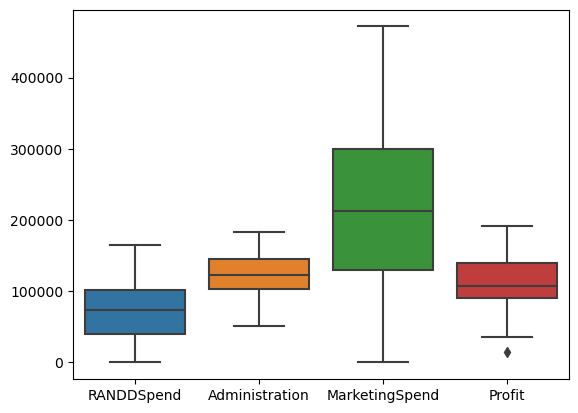

In [137]:
sns.boxplot(data=new)

# Treatment of Outlier -- Winsorizing Technique

In [138]:
q1 = new['Profit'].quantile(0.25)
q3 = new['Profit'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

214206.58999999997

In [139]:
new['Profit']=np.where(new['Profit'] < low_limit,low_limit,new['Profit'])

<AxesSubplot:>

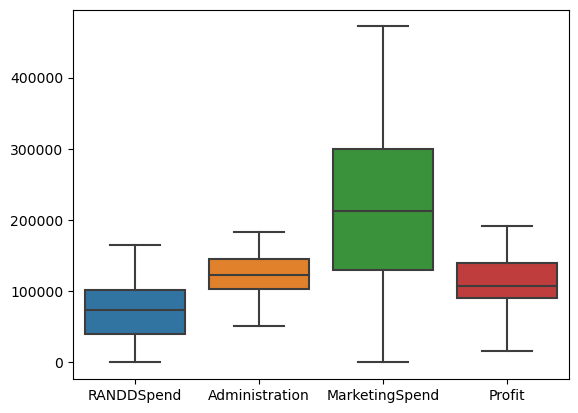

In [140]:
sns.boxplot(data=new)

# Missing Value

In [141]:
new.isna().sum()

RANDDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [142]:
new = new.drop(['State'],axis= 1)
new

,RANDDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Step 3 : Splitting the data in Training and Test set

 * Using sklearn we split 70% of our data into training set and rest in test set.
 * Setting random_state will give the same training and test set everytime on running the code

In [143]:
new.head()

,RANDDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [144]:
# Putting feature variable to X
X = new.drop('Profit', axis= 1)

# Putting response variable to y
y = new[['Profit']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [145]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Profit,RANDDSpend,Administration,MarketingSpend
49,15698.29,0.00,116983.80,45173.06
35,96479.51,46014.02,85047.44,205517.64
1,191792.06,162597.70,151377.59,443898.53
6,156122.51,134615.46,147198.87,127716.82
8,152211.77,120542.52,148718.95,311613.29


# Correlation Matrix

<AxesSubplot:title={'center':'RANDDSpend vs Profit'}, xlabel='RANDDSpend', ylabel='Profit'>

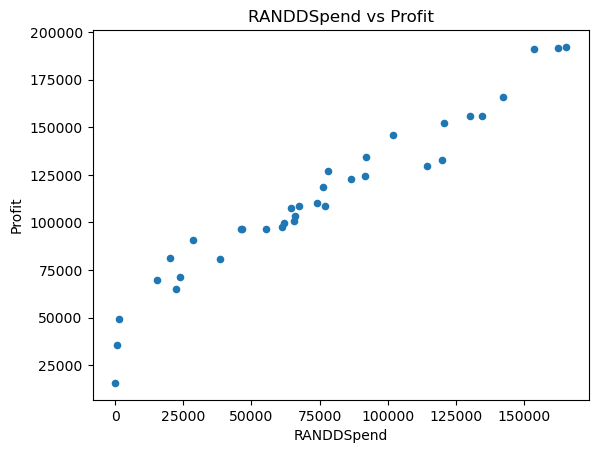

In [146]:
df.plot.scatter(x='RANDDSpend', y='Profit', title='RANDDSpend vs Profit')

In [147]:
df.corr()

,Profit,RANDDSpend,Administration,MarketingSpend
Profit,1.000000,0.971524,0.288667,0.722483
RANDDSpend,0.971524,1.000000,0.320521,0.682723
Administration,0.288667,0.320521,1.000000,-0.009905
MarketingSpend,0.722483,0.682723,-0.009905,1.000000


<AxesSubplot:>

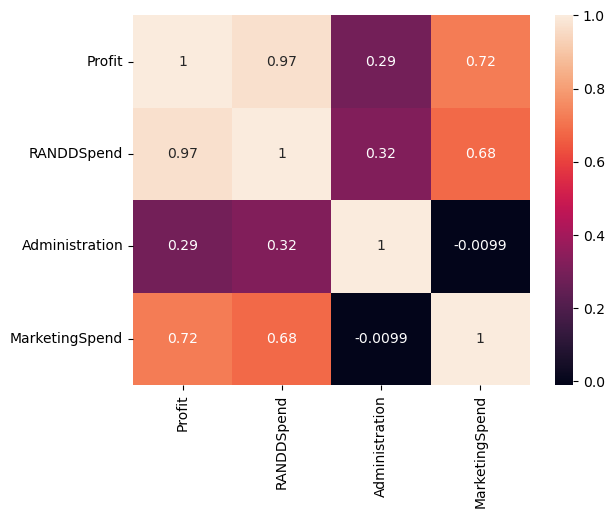

In [148]:
sns.heatmap(df.corr(),annot = True)

### TV have 96 % strong positve correlation with Profit

    R&D have high impact on Profit
    There is no colinearity in data, So every platform is independent

In [149]:
X1=df.drop(['Profit'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

RANDDSpend        7.625962
Administration    4.262675
MarketingSpend    6.635066
dtype: float64

* No collinearity in the data, indicate no multi colinearity

# Model Building

* H0 :- There is no Linear relationship between Profit and R&D spend , Administration & Marketing spend

                      Vs 
* H1 :- There is Linear relationship between Profit and R&D spend , Administration & Marketing spend

Alpha = 0.05 (5%)

In [150]:
df.Profit = np.log(df.Profit)

In [151]:
import statsmodels.formula.api as smf
model = smf.ols('Profit ~ RANDDSpend + Administration + MarketingSpend',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     29.21
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.65e-09
Time:                        10:33:15   Log-Likelihood:               -0.72859
No. Observations:                  35   AIC:                             9.457
Df Residuals:                      31   BIC:                             15.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.7435      0.224     48.047      0.000      10.287      11.200
RANDDSpend      8.057e-06   1.47e-06      5.489      0.000    5.06e-06    1.11e-05
Administration  8.911e-07   1.75e-06      0.509      0.614   -2.68e-06    4.46e-06
MarketingSpend  3.994e-07   5.33e-07      0.749      0.459   -6.88e-07    1.49e-06
==============================================================================
Omnibus:                       52.629   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.744
Skew:                          -3.290   Prob(JB):                     5.01e-71
Kurtosis:                      16.368   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


* There is Linear relationship between Profit and RANDDSpend
* There is no Linear relationship between Profit and Administration,MarketingSpend
* so we will remove and re-run the model
* 73% is accuracy of model , so we say model is good fit

In [152]:
model2=smf.ols('Profit ~ RANDDSpend',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     90.74
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.39e-11
Time:                        10:33:15   Log-Likelihood:                -1.0851
No. Observations:                  35   AIC:                             6.170
Df Residuals:                      33   BIC:                             9.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8710      0.082    132.070      0.000      10.704      11.039
RANDDSpend  8.943e-06   9.39e-07      9.526      0.000    7.03e-06    1.09e-05
==============================================================================
Omnibus:                       52.076   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.909
Skew:                          -3.258   Prob(JB):                     1.86e-68
Kurtosis:                      16.093   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* There is Linear relationship between Profit and RANDDSpend
* 73 % is accuracy of model , so we say model is good fit 
* Y = 10.8710 + 8.943e-06 * RANDDSpend

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [153]:
df.head()

,Profit,RANDDSpend,Administration,MarketingSpend
49,9.661307,0.00,116983.80,45173.06
35,11.477086,46014.02,85047.44,205517.64
1,12.164167,162597.70,151377.59,443898.53
6,11.958396,134615.46,147198.87,127716.82
8,11.933028,120542.52,148718.95,311613.29


In [154]:
Y = 10.8710 + 8.943e-06 *46014.02
Y

11.28250338086

In [155]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Profit,RANDDSpend,Administration,MarketingSpend,fitted_value,residual
49,9.661307,0.00,116983.80,45173.06,10.871047,-1.209740
35,11.477086,46014.02,85047.44,205517.64,11.282549,0.194537
1,12.164167,162597.70,151377.59,443898.53,12.325152,-0.160985
6,11.958396,134615.46,147198.87,127716.82,12.074908,-0.116512
8,11.933028,120542.52,148718.95,311613.29,11.949054,-0.016026


# Linearity

<AxesSubplot:title={'center':'RANDDSpend vs Profit'}, xlabel='RANDDSpend', ylabel='Profit'>

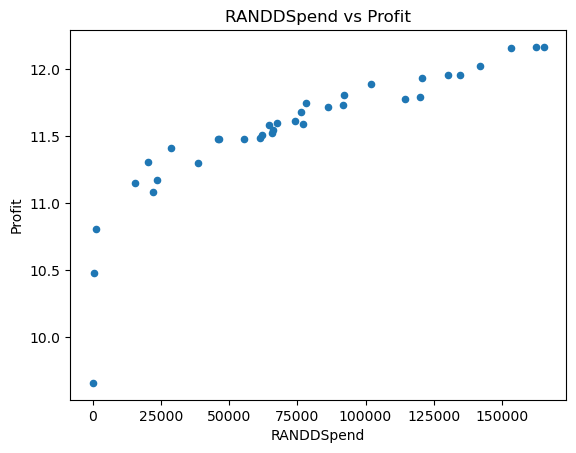

In [156]:
df.plot.scatter(x='RANDDSpend', y='Profit', title='RANDDSpend vs Profit')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

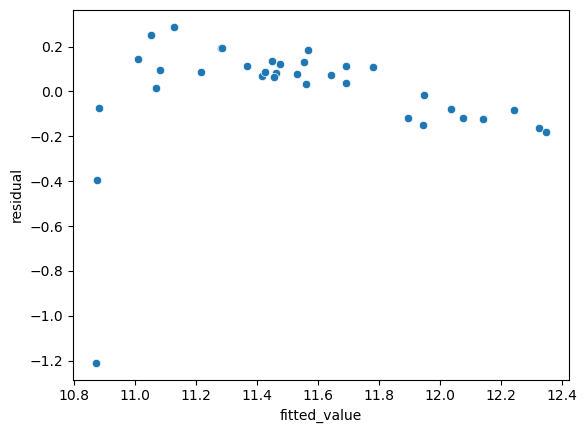

In [157]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

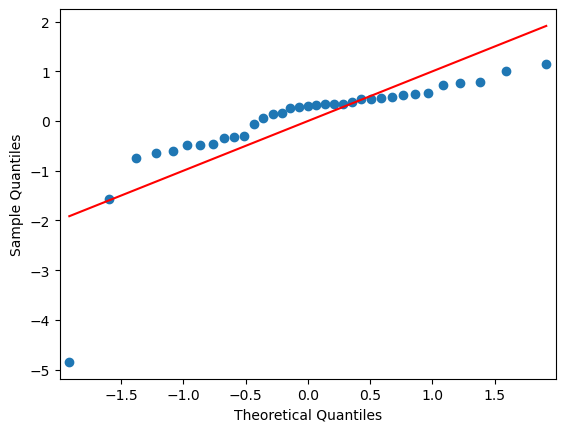

In [158]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID

<AxesSubplot:ylabel='Frequency'>

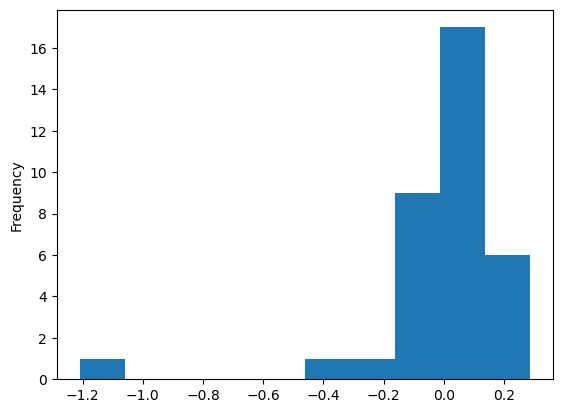

In [159]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [160]:
y_test = np.log(y_test)
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,RANDDSpend,Administration,MarketingSpend,Profit
9,123334.88,108679.17,304981.62,11.916789
37,44069.95,51283.14,197029.42,11.407000
45,1000.23,124153.04,1903.93,11.081005
11,100671.96,91790.61,249744.55,11.879368
3,144372.41,118671.85,383199.62,12.116706


In [161]:
df_test['Prediction']=model2.predict(df_test)# predict = all row prediction ( Auto )
df_test['Original_Prediction']=np.exp(model2.predict(df_test))
df_test.head()

,RANDDSpend,Administration,MarketingSpend,Profit,Prediction,Original_Prediction
9,123334.88,108679.17,304981.62,11.916789,11.974026,158581.841059
37,44069.95,51283.14,197029.42,11.407000,11.265163,78054.524715
45,1000.23,124153.04,1903.93,11.081005,10.879992,53103.178450
11,100671.96,91790.61,249744.55,11.879368,11.771352,129489.162989
3,144372.41,118671.85,383199.62,12.116706,12.162164,191408.257567


In [162]:
Y = 10.8710 + 8.943e-06 * 123334.88
Y

11.97398383184

# Test

In [163]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Profit, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.9


# Train

In [164]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Profit, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.73


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Loss Function - RMSE

In [165]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df['Profit'], df['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(np.exp(model_rmse)))

RMSE 1.28


In [166]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['Profit'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(np.exp(model_rmse)))

RMSE 1.12


In [167]:
d1 = {'Customer':pd.Series(['Himanshu','Chetan','Mahesh']),
      'RANDDSpend'      :pd.Series([113334.88 ,135434.88 ,103234.88 ]),
      'Administration'   :pd.Series([95780,91880,93490]),
      'MarketingSpend':pd.Series([187129.42 ,198079.42,177029.42]),
     }
live = pd.DataFrame(d1)
live

,Customer,RANDDSpend,Administration,MarketingSpend
0,Himanshu,113334.88,95780,187129.42
1,Chetan,135434.88,91880,198079.42
2,Mahesh,103234.88,93490,177029.42


In [168]:
live['future Prediction']=np.round(model.predict(live),2)
live

,Customer,RANDDSpend,Administration,MarketingSpend,future Prediction
0,Himanshu,113334.88,95780,187129.42,11.82
1,Chetan,135434.88,91880,198079.42,12.00
2,Mahesh,103234.88,93490,177029.42,11.73


# Finish